In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

def plot_accuracy(history, miny=None):
  acc = history.history['acc']
  test_acc = history.history['val_acc']
  epochs = range(len(acc))
  plt.plot(epochs, acc)
  plt.plot(epochs, test_acc)
  if miny:
    plt.ylim(miny, 1.0)
  plt.title('accuracy') 
  plt.figure()


In [0]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [0]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [0]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [69]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [0]:
x_val = train_data[:1000]
partial_x_train = train_data[1000:]

y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]

In [72]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 32))
model.add(keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=500,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 24000 samples, validate on 1000 samples
Epoch 1/40
24000/24000 [==============================] - 31s 1ms/sample - loss: 0.6926 - acc: 0.5171 - val_loss: 0.6918 - val_acc: 0.5150
Epoch 2/40
24000/24000 [==============================] - 29s 1ms/sample - loss: 0.6774 - acc: 0.5765 - val_loss: 0.5714 - val_acc: 0.7470
Epoch 3/40
24000/24000 [==============================] - 29s 1ms/sample - loss: 0.6261 - acc: 0.6877 - val_loss: 0.5590 - val_acc: 0.7560
Epoch 4/40
24000/24000 [==============================] - 29s 1ms/sample - loss: 0.6264 - acc: 0.6783 - val_loss: 0.6154 - val_acc: 0.6780
Epoch 5/40
24000/24000 [==============================] - 29s 1ms/sample - loss: 0.6149 - acc: 0.6775 - val_loss: 0.6045 - val_acc: 0.6940
Epoch 6/40
24000/24000 [==============================] - 29s 1ms/sample - loss: 0.5764 - acc: 0.7266 - val_loss: 0.5179 - val_acc: 0.7900
Epoch 7/40
21500/24000 [=========================>....] - ETA: 3s - loss: 0.5573 - acc: 0.7600

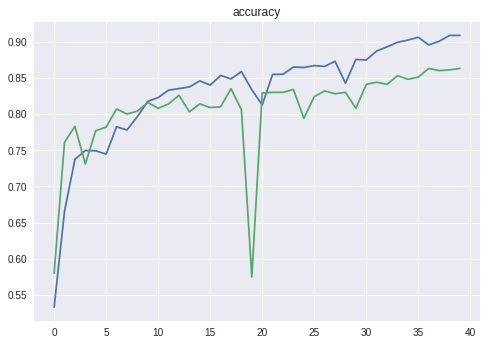

<Figure size 576x396 with 0 Axes>

In [63]:
plot_accuracy(history)